In [6]:
"""Install Dependencies"""

!pip install yfinance --upgrade --no-cache-dir



Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [0]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from pandas.plotting import scatter_matrix

import fix_yahoo_finance as yf
from google.colab import drive
import seaborn as sns
#import models
from sklearn import preprocessing


#for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style

In [2]:
#mount on google drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [277]:
#get the stock data from yahoo finance
sns.set()

yf.pdr_override()
df_full = pdr.get_data_yahoo("AAPL", start="2010-01-01", end='2019-09-01')
df_full.to_csv('AAPL.csv',index=False)
#df_full.set_index("Date", inplace=True)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.681330,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.727465,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.302330,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.253704,119282800
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.428249,111902700


In [278]:
#calculating moving avg

close_price=df_full['Adj Close']

mavg=close_price.rolling(window=100).mean()
#dir(close_price)

mavg.tail()

Date
2019-08-26    198.086917
2019-08-27    198.186503
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
Name: Adj Close, dtype: float64

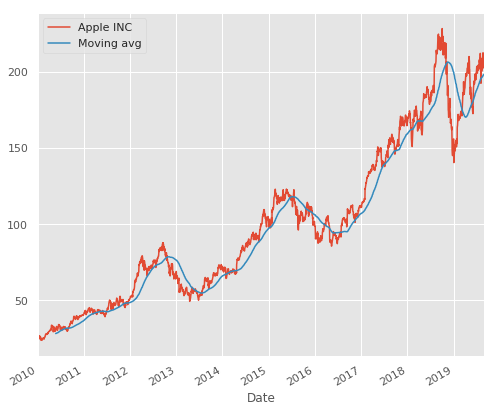

In [279]:
%matplotlib inline
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_price.plot(label='Apple INC')
mavg.plot(label='Moving avg')
plt.legend()

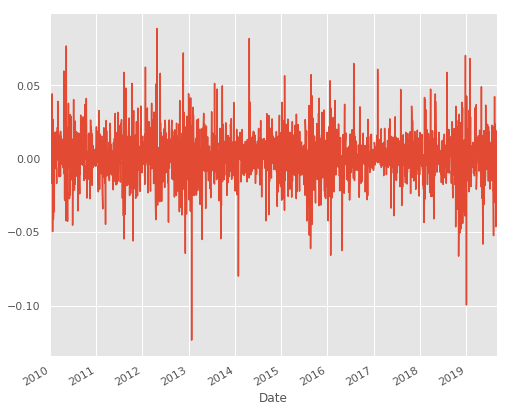

In [280]:
# return deviation - Rate of return on the stock

returns= close_price/close_price.shift(1) - 1

returns.plot(label= "Returns")

In [281]:
#comparing with other competitors

df_comp = pdr.get_data_yahoo(['AAPL','GOOGL','AMZN','NFLX','FB'], start="2014-01-01", end='2019-09-01')['Adj Close']
#df_comp.set_index('Date', inplace=True)
df_comp.tail()

[*********************100%***********************]  5 of 5 downloaded


,AAPL,AMZN,FB,GOOGL,NFLX
Date,,,,,
2019-08-26,206.490005,1768.869995,180.360001,1171.180054,294.980011
2019-08-27,204.160004,1761.829956,181.300003,1170.819946,291.029999
2019-08-28,205.529999,1764.250000,181.759995,1173.750000,291.769989
2019-08-29,209.009995,1786.400024,185.570007,1194.239990,296.779999
2019-08-30,208.740005,1776.290039,185.669998,1190.530029,293.750000


In [282]:
#Checking their correlation

return_comp=df_comp.pct_change()

correlation=return_comp.corr()
correlation

,AAPL,AMZN,FB,GOOGL,NFLX
AAPL,1.000000,0.449854,0.416482,0.482152,0.336189
AMZN,0.449854,1.000000,0.548392,0.619082,0.456117
FB,0.416482,0.548392,1.000000,0.602579,0.394094
GOOGL,0.482152,0.619082,0.602579,1.000000,0.456228
NFLX,0.336189,0.456117,0.394094,0.456228,1.000000


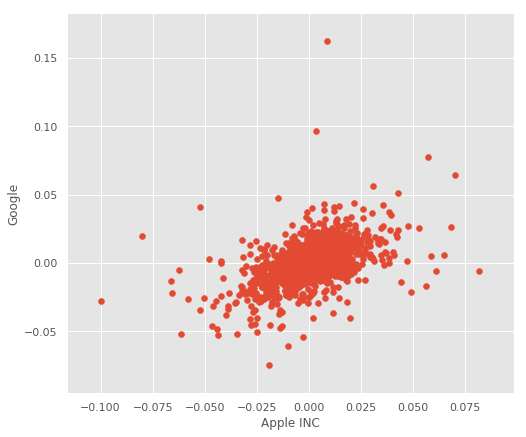

In [283]:
#compare the returns between two stocks
#for eg- Apple, Google

#dir(plt)

plt.scatter(return_comp['AAPL'], return_comp['GOOGL'])
plt.xlabel('Apple INC')
plt.ylabel('Google')
plt.show()

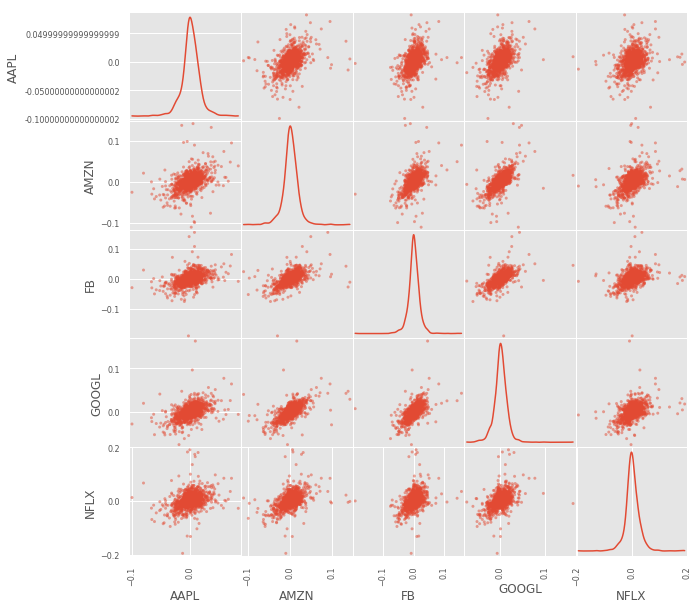

In [284]:
#comparing all competitors stocks

scatter_matrix(return_comp, diagonal='kde', figsize=(10, 10))
plt.show()

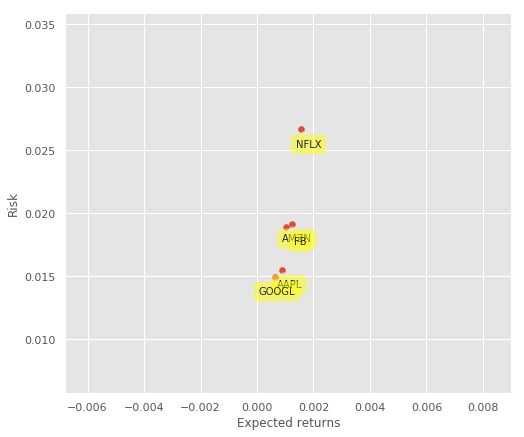

In [285]:
plt.scatter(return_comp.mean(), return_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(return_comp.columns, return_comp.mean(), return_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [0]:
#making it ready for the model

df_reg=df_full.loc[:,['Adj Close', 'Volume']]
df_reg['High PCT']=(df_full['High']-df_full['Low'])/ df_full['Close'] * 100
df_reg['PCT Change']=(df_full['Close'] - df_full['Open'])/ df_full['Open'] * 100


In [287]:
df_reg.head()

,Adj Close,Volume,High PCT,PCT Change
Date,,,,
2010-01-04,26.681330,123432400,0.990607,0.271751
2010-01-05,26.727465,150476200,1.091521,-0.102521
2010-01-06,26.302330,138040000,2.123525,-1.590631
2010-01-07,26.253704,119282800,1.400894,-0.552539
2010-01-08,26.428249,111902700,1.386923,0.798865


In [0]:
"""Preprocessing 
1-Drop missing value
2-Separating the label here, we want to predict the AdjClose
3-Scale the X so that everyone can have the same distribution for linear regression
4-Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
5-Separate label and identify it as y
6-Separation of training and testing of model by cross validation train test split"""


df_reg.fillna(value=-9999, inplace=True)

In [289]:
# seprate X and y 

X=np.array(df_reg.drop(['Adj Close'],1))
y=np.array(df_reg['Adj Close'])

X = preprocessing.scale(X)

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.01, random_state=42)

train_array=int(0.9*len(df_full))
train_array

"""X_train=X[:train_array]
X_test=X[train_array+1:]
print(len(X_train), len(X_test))

y_train=y[:train_array]
y_test=y[train_array+1:]"""

'X_train=X[:train_array]\nX_test=X[train_array+1:]\nprint(len(X_train), len(X_test))\n\ny_train=y[:train_array]\ny_test=y[train_array+1:]'

In [290]:
#dir(X_train)
len(X)

2432

In [0]:
# data is ready for placing in model
#importing all the needed models

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
lin_reg=LinearRegression(n_jobs=1)
ridge=Ridge()

In [292]:
# using the linear regression 

lin_reg.fit(X_train, y_train)

y_pred=lin_reg.predict(X_test)

from sklearn import metrics

rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

37.08470060156938

In [293]:

lin_score=lin_reg.score(X_test,y_test)
lin_score


0.5686237245032244

In [294]:
#Using Ridge Regression

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [295]:
ridge_score=clfpoly2.score(X_test,y_test)
ridge_score

0.7619213581077497

In [0]:
#using Kneighbors

from sklearn.neighbors import KNeighborsRegressor

In [0]:
knr=KNeighborsRegressor()

In [298]:
knr.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [299]:
knr_score= knr.score(X_test, y_test)
knr_score

0.8428259954702636

In [300]:
y_pred=knr.predict(X_test)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse
len(y_pred)

25

In [301]:
df_reg['Forecast'] = np.nan
df_reg.tail()

,Adj Close,Volume,High PCT,PCT Change,Forecast
Date,,,,,
2019-08-26,206.490005,26043600,1.031529,0.306035,NaN
2019-08-27,204.160004,25873300,2.458858,-1.780043,NaN
2019-08-28,205.529999,15938800,1.167710,0.700633,NaN
2019-08-29,209.009995,20990500,1.272668,0.244602,NaN
2019-08-30,208.740005,21143400,1.556961,-0.675675,NaN


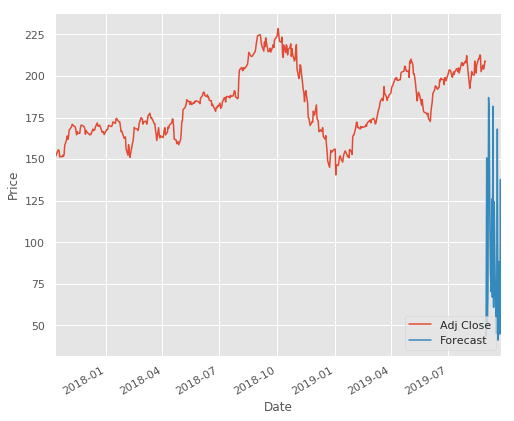

In [302]:
#Plotting the result

import datetime
last_date = df_reg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in y_pred:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df_reg.loc[next_date] = [np.nan for _ in range(len(df_reg.columns)-1)]+[i]
df_reg['Adj Close'].tail(500).plot()
df_reg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()